In [102]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.morphology import skeletonize, thin
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

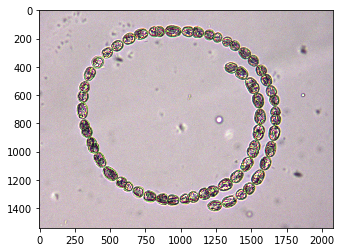

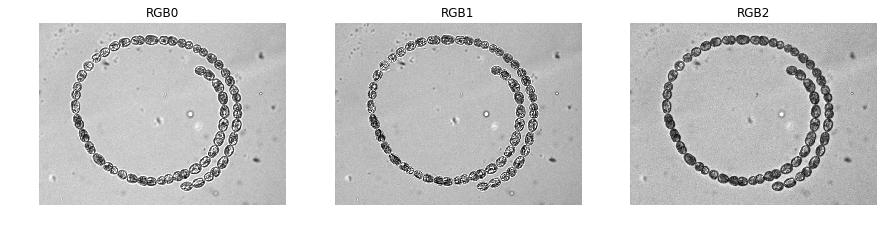

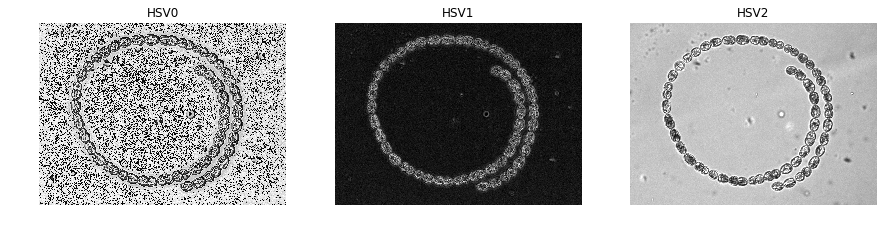

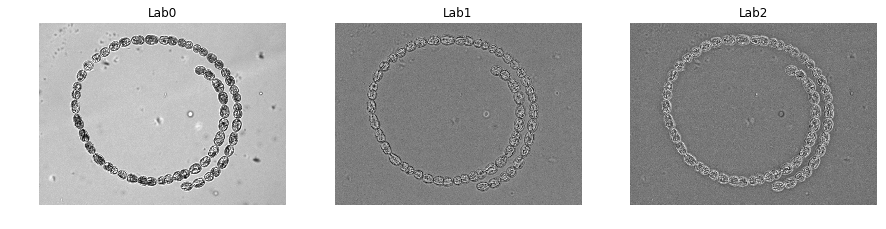

In [14]:
im = cv2.imread('dataset/Single 40x - Anabaena spiroides 2.jpg')
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)

images = [im_rgb, im_hsv, im_lab]
names = ['RGB', 'HSV', 'Lab']
for n, img in enumerate(images):
    fig, axeslist = plt.subplots(ncols=3, nrows=1,figsize=(15,15))
    for i in range(3):
        axeslist.ravel()[i].imshow(img[:,:,i], cmap='gray')
        axeslist.ravel()[i].set_title(names[n] + str(i))
        axeslist.ravel()[i].set_axis_off()
    plt.show()

In [15]:
img = im_lab[:,:,0]

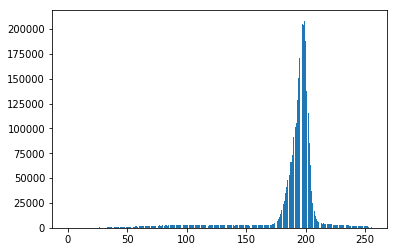

In [16]:
hist, _ = np.histogram(img, 256, [0, 256])
plt.bar(range(0,256), hist)
plt.show()

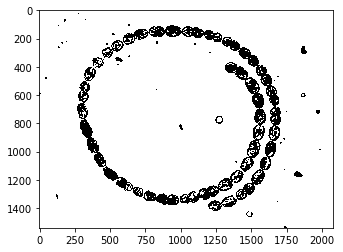

In [17]:
blur = cv2.GaussianBlur(img,(11,11),0)
ret,thresh = cv2.threshold(blur,160,255,0)
plt.imshow(thresh, cmap='gray')
plt.show()

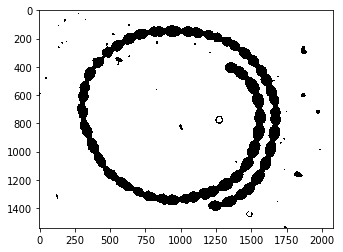

In [27]:
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(closing, cmap='gray')
plt.show()

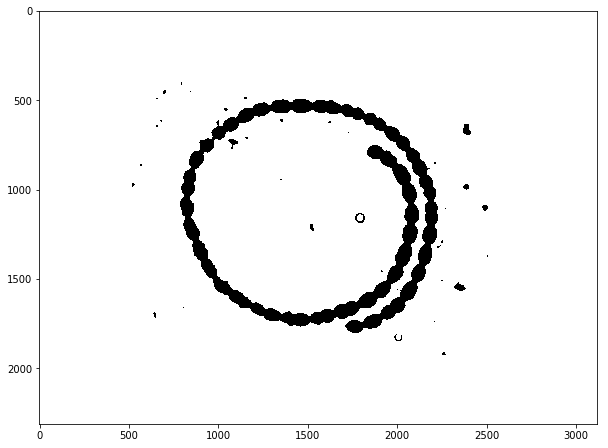

In [28]:
newimage = np.ones((int(closing.shape[0]*1.5), int(closing.shape[1]*1.5))) * 255
newimage[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)] = closing
plt.figure(figsize=(10,8))
plt.imshow(newimage, cmap='gray')
plt.show()

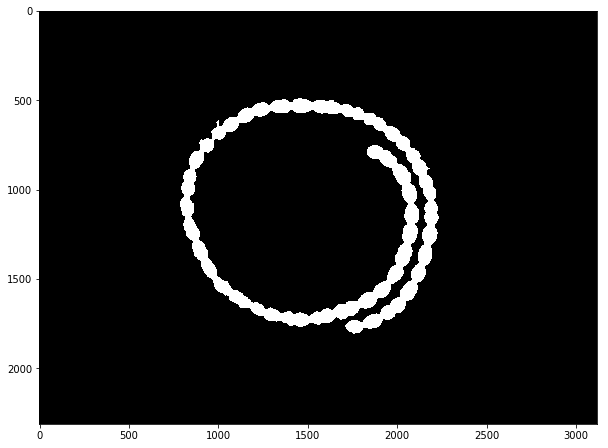

In [60]:
_, contours, hierarchy = cv2.findContours(newimage.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
contours.sort(key=cv2.contourArea, reverse=True)
mask = np.zeros(newimage.shape,np.uint8)
# cv2.drawContours(mask,[contours[1]],-1,(255,255,255), thickness=3)
cv2.drawContours(mask,[contours[1]],-1,(255,255,255), thickness=-1)
# cv2.fillPoly(mask, pts=contours[0], color=(255,255,255))
plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()

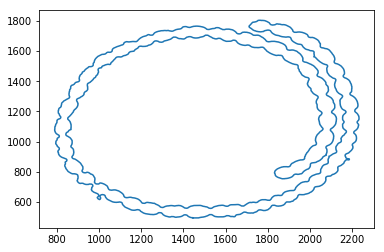

In [57]:
contour = np.array([list(i[0]) for i in contours[1]])
for _ in range(5):
    contour = subdivide_polygon(contour, degree=2, preserve_ends=True)
# approximate subdivided polygon with Douglas-Peucker algorithm
appr = approximate_polygon(contour, tolerance=0.02)

plt.plot(appr[:,0], appr[:,1])

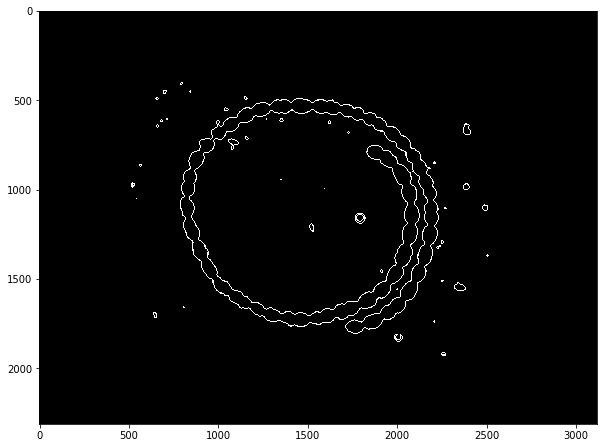

In [30]:
mask = np.zeros(newimage.shape,np.uint8)
cv2.drawContours(mask,contours[1:],-1,(255,255,255), thickness=3)
# cv2.fillPoly(mask, pts=contours[0], color=(255,255,255))
plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()

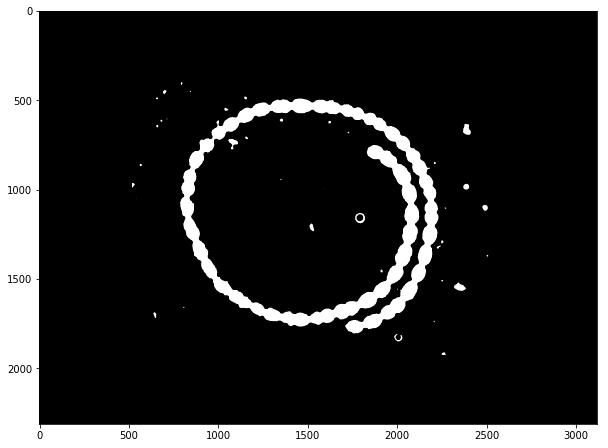

In [58]:
image = np.uint8(255-newimage)
blurred = cv2.blur(image, (5,5))
plt.figure(figsize=(10,8))
plt.imshow(blurred, cmap='gray')
plt.show()

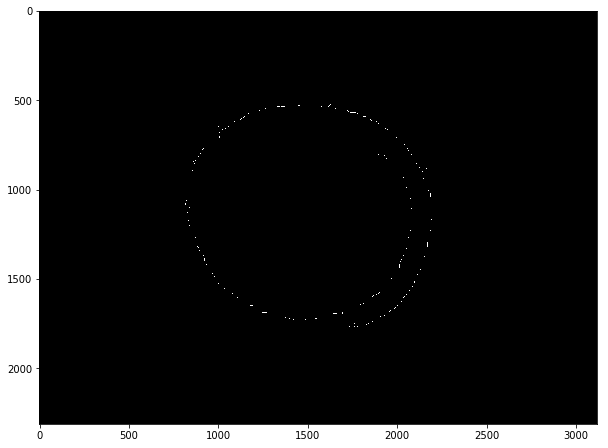

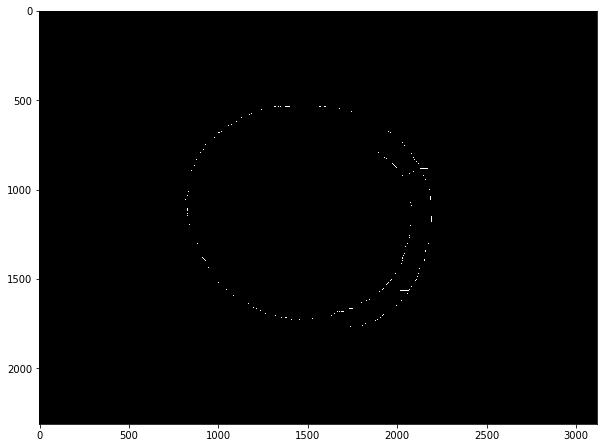

In [103]:
# perform skeletonization
# skeleton = skeletonize(image/255)
skeleton = skeletonize(mask/255)
thinned = thin(mask/255)
plt.figure(figsize=(10,8))
# plt.figure(figsize=(40,24))
plt.imshow(skeleton, cmap='gray')
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(thinned, cmap='gray')
plt.show()

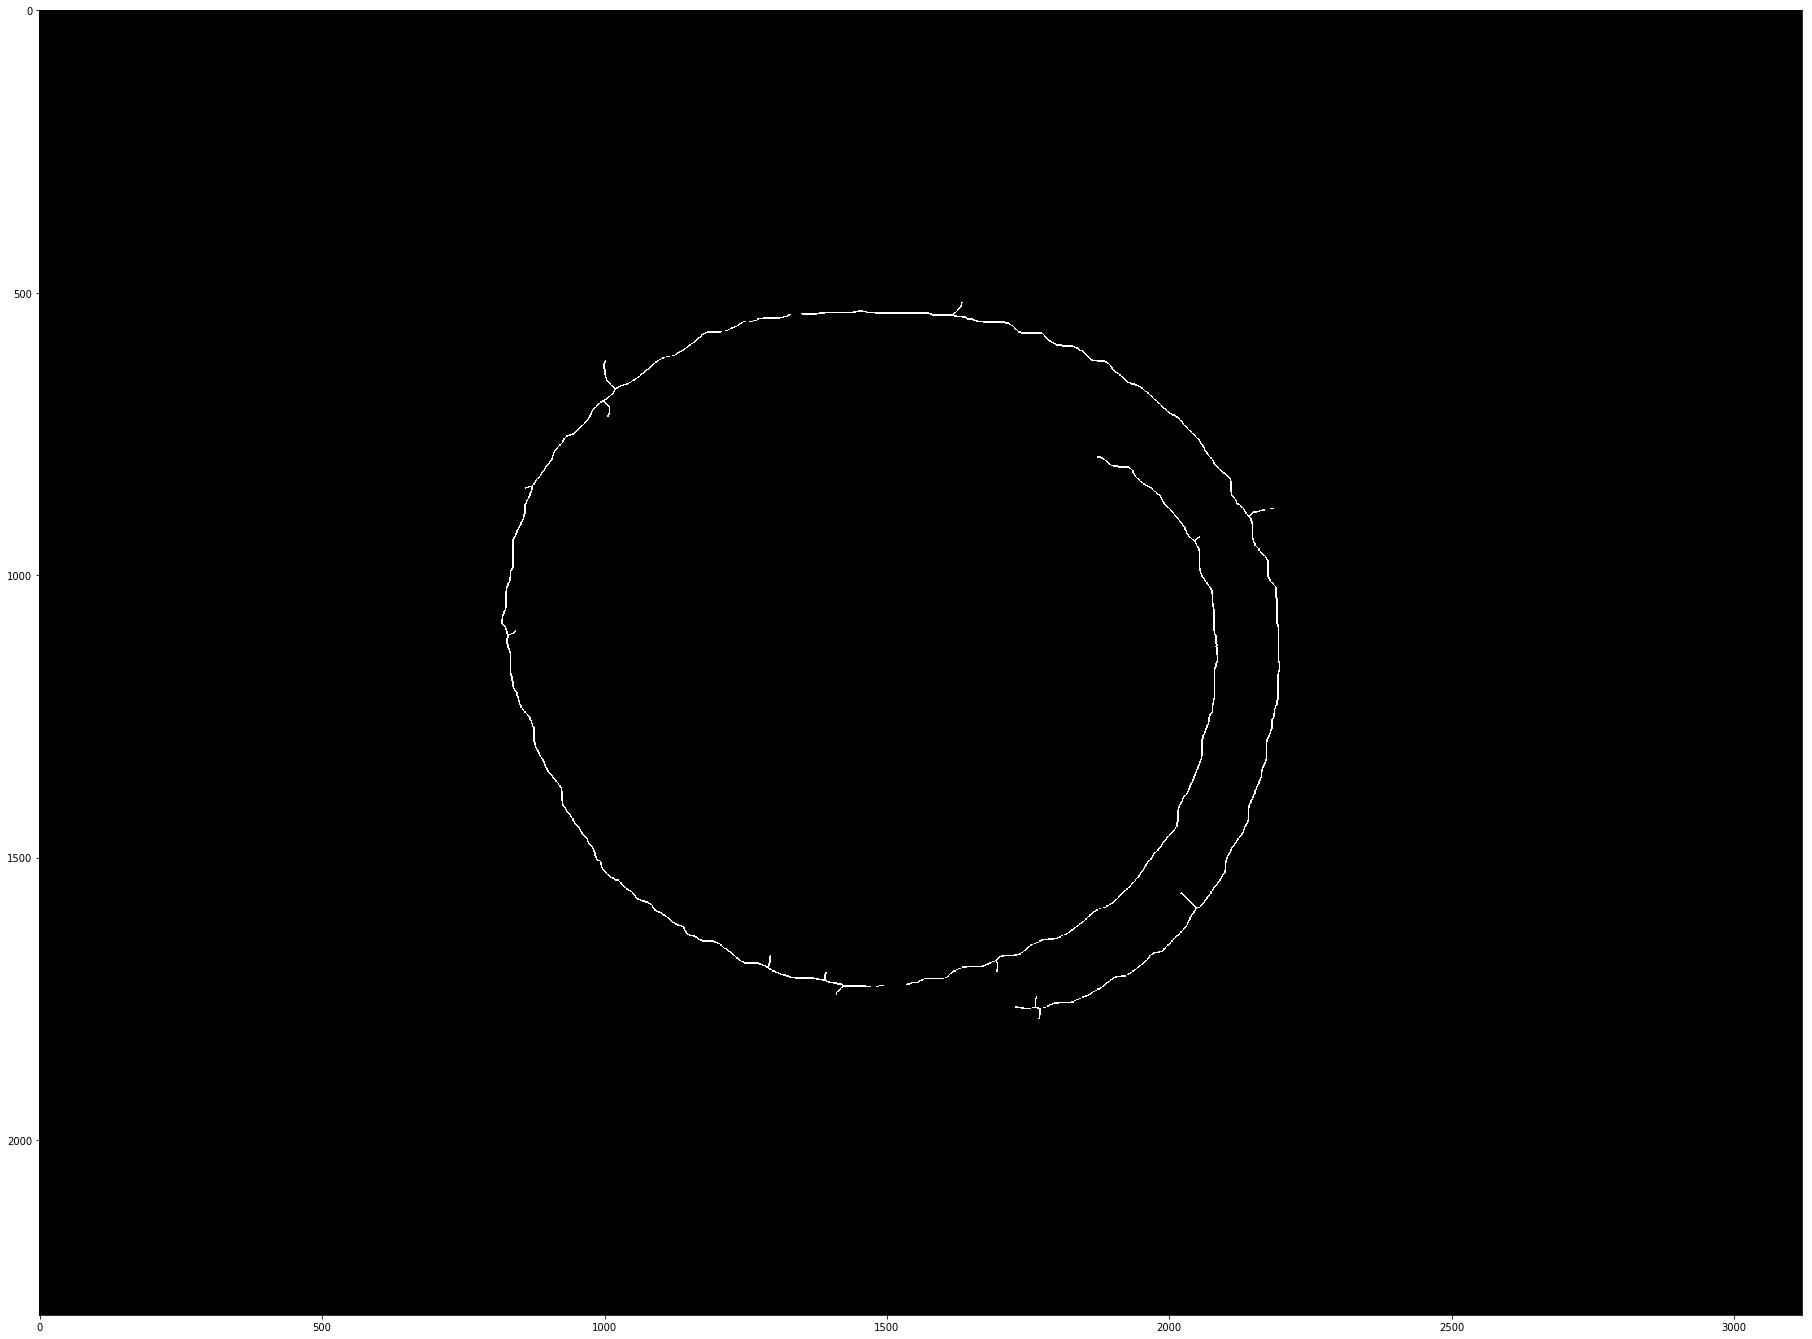

In [105]:
_, contours, hierarchy = cv2.findContours(skeleton.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
contours.sort(key=cv2.contourArea, reverse=True)
skelemask = np.zeros(skeleton.shape,np.uint8)
# cv2.drawContours(mask,[contours[1]],-1,(255,255,255), thickness=3)
cv2.drawContours(skelemask,contours,-1,(255,255,255), thickness=-1)
# cv2.fillPoly(mask, pts=contours[0], color=(255,255,255))
plt.figure(figsize=(40,24))
plt.imshow(skelemask, cmap='gray')
plt.show()

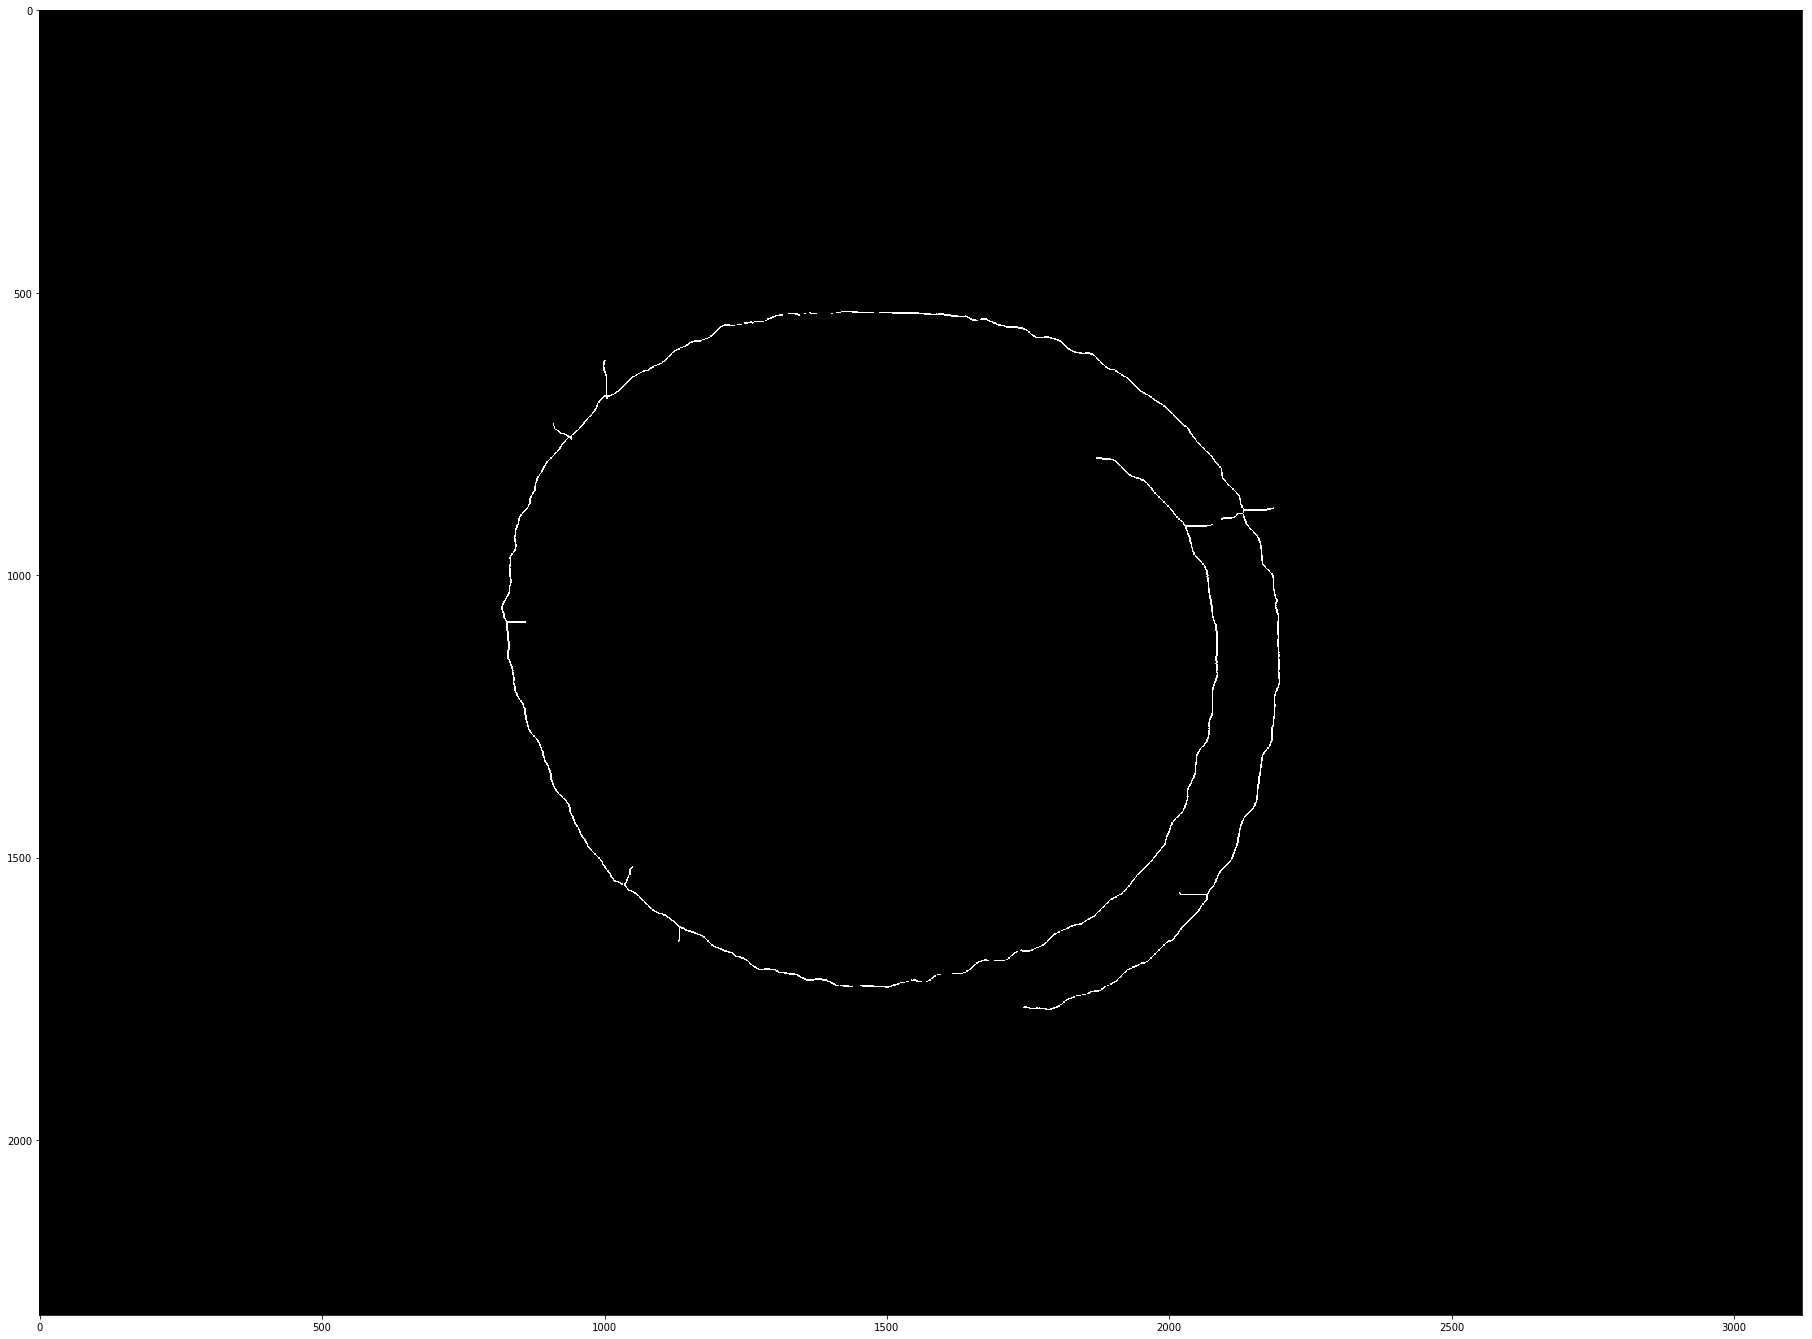

In [106]:
_, contours, hierarchy = cv2.findContours(thinned.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
contours.sort(key=cv2.contourArea, reverse=True)
thinmask = np.zeros(thinned.shape,np.uint8)
# cv2.drawContours(mask,[contours[1]],-1,(255,255,255), thickness=3)
cv2.drawContours(thinmask,contours,-1,(255,255,255), thickness=-1)
# cv2.fillPoly(mask, pts=contours[0], color=(255,255,255))
plt.figure(figsize=(40,24))
plt.imshow(thinmask, cmap='gray')
plt.show()

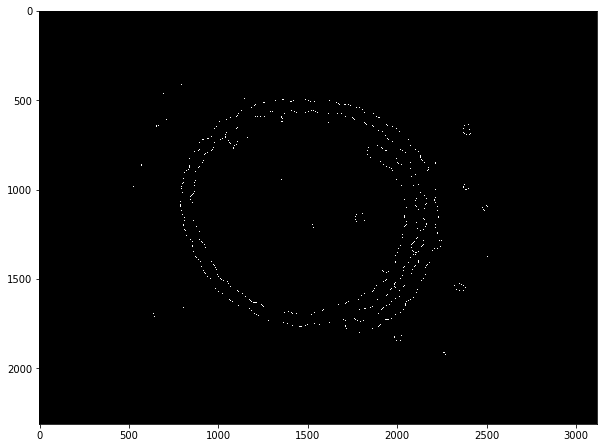

In [24]:
image = np.uint8(newimage)
blurred = cv2.blur(image, (5,5)) # imagen de entrada, tamaño del kernel de suavizado
canny = cv2.Canny(blurred,0, 50, apertureSize=5) # imagen de entrada, umbral mínimo y máximo utilizado en la histéresis
plt.figure(figsize=(10,8))
plt.imshow(canny, cmap='gray')
plt.show()